# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [36]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jinhyeongpark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# Read your api key environment variable
load_dotenv()

api_key = os.getenv("NEWS_API")

In [38]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [39]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                     )

In [40]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy',
                                      )

In [56]:
# Create the DataFrame
def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                "text" : text
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [57]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = get_sentiment_score(btc_articles, 'content')
btc_df.head(5)

Compound  Negative  Neutral  Positive  \
0    0.0000       0.0    1.000     0.000   
1    0.5106       0.0    0.901     0.099   
2    0.0000       0.0    1.000     0.000   
3    0.5719       0.0    0.847     0.153   
4    0.4767       0.0    0.864     0.136   

                                                text  
0  The plant opening northeast of Niagara Falls t...  
1  Earlier this year, Nothing released a pair of ...  
2  MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...  
3  In keeping with a previous announcement, AMC t...  
4  Posted \r\nAfter becoming the first country to...

In [58]:
# Create the Ethereum sentiment scores DataFrame
eth_df = get_sentiment_score(eth_articles, 'content')
eth_df.head(5)

Compound  Negative  Neutral  Positive  \
0    0.7783     0.000    0.784     0.216   
1    0.0000     0.000    1.000     0.000   
2    0.5719     0.000    0.847     0.153   
3    0.6542     0.000    0.822     0.178   
4   -0.0516     0.079    0.847     0.074   

                                                text  
0  If you claim ownership, someone will probably ...  
1  More than $1.2 million has already been spent ...  
2  In keeping with a previous announcement, AMC t...  
3  Ethereum has been on a tear this year. Its out...  
4  Blockchain startup MonoX Finance said on Wedne...

In [59]:
# Describe the Bitcoin Sentiment
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [60]:
# Sentiment scores dictionaries
btc_df.describe()

Compound   Negative    Neutral   Positive
count  20.000000  20.000000  20.000000  20.000000
mean    0.099135   0.016200   0.939900   0.043900
std     0.305228   0.029573   0.068112   0.065594
min    -0.381800   0.000000   0.791000   0.000000
25%     0.000000   0.000000   0.891750   0.000000
50%     0.000000   0.000000   0.957000   0.000000
75%     0.463275   0.010750   1.000000   0.108250
max     0.571900   0.080000   1.000000   0.158000

In [61]:
# Describe the Ethereum Sentiment
eth_df.describe()

Compound  Negative    Neutral   Positive
count  20.00000  20.00000  20.000000  20.000000
mean    0.21461   0.02620   0.898450   0.075250
std     0.29546   0.03871   0.078875   0.065669
min    -0.31820   0.00000   0.729000   0.000000
25%     0.00000   0.00000   0.844000   0.000000
50%     0.17635   0.00000   0.910500   0.072000
75%     0.42490   0.06200   0.955500   0.113000
max     0.77830   0.11500   1.000000   0.216000

### Questions:

Q: Which coin had the highest mean positive score?

A: ETH 0.07525

Q: Which coin had the highest compound score?

A: 0.77830

Q. Which coin had the highest positive score?

A: ETH 0.216

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [62]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [63]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary


In [64]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
    # There are none
    
    return tokens
# tokenizer(btc_df.iloc[0]['content'])

In [65]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df

Compound  Negative  Neutral  Positive  \
0     0.0000     0.000    1.000     0.000   
1     0.5106     0.000    0.901     0.099   
2     0.0000     0.000    1.000     0.000   
3     0.5719     0.000    0.847     0.153   
4     0.4767     0.000    0.864     0.136   
5     0.1280     0.000    0.957     0.043   
6     0.0000     0.000    1.000     0.000   
7     0.0000     0.000    1.000     0.000   
8    -0.3818     0.080    0.920     0.000   
9    -0.1027     0.043    0.957     0.000   
10    0.5106     0.000    0.842     0.158   
11    0.5106     0.000    0.858     0.142   
12   -0.3818     0.077    0.923     0.000   
13    0.0000     0.000    1.000     0.000   
14   -0.3182     0.062    0.938     0.000   
15    0.0000     0.000    1.000     0.000   
16    0.4588     0.062    0.791     0.147   
17    0.0000     0.000    1.000     0.000   
18    0.0000     0.000    1.000     0.000   
19    0.0000     0.000    1.000     0.000   

                                                 text  \
0   The plant opening northeast of Niagara Falls t...   
1   Earlier this year, Nothing released a pair of ...   
2   MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...   
3   In keeping with a previous announcement, AMC t...   
4   Posted \r\nAfter becoming the first country to...   
5   Available for the same price, $99, on December...   
6   (Reuters) - A computer scientist who has claim...   
7   Spotify has removed the shuffle button from al...   
8   Dec 4 (Reuters) - Bitcoin dropped 8.4% to $49,...   
9   Australian Baseball League club Perth Heat wil...   
10  Posted \r\nBitcoin shed a fifth of its value o...   
11  Posted \r\nBitcoin shed a fifth of its value o...   
12  Dec 3 (Reuters) - Bitcoin plunged 5.5% to $53,...   
13  A representation of the virtual cryptocurrency...   
14  Bitcoin tumbled almost 5% on Monday as the sta...   
15  Posted \r\nEl Salvador plans to build the worl...   
16  In a disclosure that should surprise no one, t...   
17  Posted \r\nA computer scientist who has claime...   
18  Posted \r\nA computer scientist who has claime...   
19  Representations of the virtual currency Bitcoi...   

                                               tokens  
0   [the, plant, opening, northeast, of, niagara, ...  
1   [earlier, this, year, nothing, released, a, pa...  
2   [mizata, el, salvadorlondon, nov, 22, reuters,...  
3   [in, keeping, with, a, previous, announcement,...  
4   [posted, after, becoming, the, first, country,...  
5   [available, for, the, same, price, 99, on, dec...  
6   [reuters, a, computer, scientist, who, ha, cla...  
7   [spotify, ha, removed, the, shuffle, button, f...  
8   [dec, 4, reuters, bitcoin, dropped, 84, to, 49...  
9   [australian, baseball, league, club, perth, he...  
10  [posted, bitcoin, shed, a, fifth, of, it, valu...  
11  [posted, bitcoin, shed, a, fifth, of, it, valu...  
12  [dec, 3, reuters, bitcoin, plunged, 55, to, 53...  
13  [a, representation, of, the, virtual, cryptocu...  
14  [bitcoin, tumbled, almost, 5, on, monday, a, t...  
15  [posted, el, salvador, plan, to, build, the, w...  
16  [in, a, disclosure, that, should, surprise, no...  
17  [posted, a, computer, scientist, who, ha, clai...  
18  [posted, a, computer, scientist, who, ha, clai...  
19  [representation, of, the, virtual, currency, b...

In [66]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df

Compound  Negative  Neutral  Positive  \
0     0.7783     0.000    0.784     0.216   
1     0.0000     0.000    1.000     0.000   
2     0.5719     0.000    0.847     0.153   
3     0.6542     0.000    0.822     0.178   
4    -0.0516     0.079    0.847     0.074   
5    -0.1531     0.045    0.955     0.000   
6     0.5106     0.000    0.901     0.099   
7     0.4939     0.000    0.881     0.119   
8     0.0000     0.000    1.000     0.000   
9     0.3818     0.000    0.920     0.080   
10    0.3612     0.000    0.930     0.070   
11    0.4019     0.115    0.729     0.155   
12    0.2732     0.075    0.814     0.111   
13   -0.0418     0.086    0.835     0.079   
14    0.1280     0.000    0.957     0.043   
15   -0.3182     0.062    0.938     0.000   
16    0.0000     0.000    1.000     0.000   
17    0.2247     0.000    0.942     0.058   
18    0.0772     0.062    0.867     0.070   
19    0.0000     0.000    1.000     0.000   

                                                 text  \
0   If you claim ownership, someone will probably ...   
1   More than $1.2 million has already been spent ...   
2   In keeping with a previous announcement, AMC t...   
3   Ethereum has been on a tear this year. Its out...   
4   Blockchain startup MonoX Finance said on Wedne...   
5   On Monday, Budweiser joined the non-fungible t...   
6   Earlier this year, Nothing released a pair of ...   
7   Nicholas Merten , an expert in cryptography, p...   
8   White Castle double cheeseburger.Erin McDowell...   
9   Regal movie theater.Shutterstock\r\nMovie-thea...   
10  While people around the world still searched f...   
11  The wait is finally over. After a year-long de...   
12  MicroStrategy CEO Michael SaylorJoe Raedle/Get...   
13  The Fine Print: The following comments are own...   
14  Available for the same price, $99, on December...   
15  Bitcoin has lost almost 20 per cent in less th...   
16  Decentralized finance or DeFi is a global fina...   
17  The U.S. Captioning Company and the British In...   
18  Image source, Getty Images\r\nImage caption, T...   
19  Hours ago, a website appeared online with the ...   

                                               tokens  
0   [if, you, claim, ownership, someone, will, pro...  
1   [more, than, 12, million, ha, already, been, s...  
2   [in, keeping, with, a, previous, announcement,...  
3   [ethereum, ha, been, on, a, tear, this, year, ...  
4   [blockchain, startup, monox, finance, said, on...  
5   [on, monday, budweiser, joined, the, nonfungib...  
6   [earlier, this, year, nothing, released, a, pa...  
7   [nicholas, merten, an, expert, in, cryptograph...  
8   [white, castle, double, cheeseburgererin, mcdo...  
9   [regal, movie, theatershutterstockmovietheater...  
10  [while, people, around, the, world, still, sea...  
11  [the, wait, is, finally, over, after, a, yearl...  
12  [microstrategy, ceo, michael, saylorjoe, raedl...  
13  [the, fine, print, the, following, comment, ar...  
14  [available, for, the, same, price, 99, on, dec...  
15  [bitcoin, ha, lost, almost, 20, per, cent, in,...  
16  [decentralized, finance, or, defi, is, a, glob...  
17  [the, u, captioning, company, and, the, britis...  
18  [image, source, getty, imagesimage, caption, t...  
19  [hour, ago, a, website, appeared, online, with...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [67]:
from collections import Counter
from nltk import ngrams

In [70]:
# Generate the Bitcoin N-grams where N=2
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_df)
eth_tokens = get_token(eth_df)

def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count


bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('the', 'plant'): 1,
 ('plant', 'opening'): 1,
 ('opening', 'northeast'): 1,
 ('northeast', 'of'): 1,
 ('of', 'niagara'): 1,
 ('niagara', 'fall'): 1,
 ('fall', 'this'): 1,
 ('this', 'month'): 1,
 ('month', 'in'): 1,
 ('in', 'somerset'): 1,
 ('somerset', 'ny'): 1,
 ('ny', 'is'): 1,
 ('is', 'part'): 1,
 ('part', 'of'): 1,
 ('of', 'a'): 6,
 ('a', '550'): 1,
 ('550', 'million'): 1,
 ('million', 'project'): 1,
 ('project', 'by'): 1,
 ('by', 'terawulf'): 1,
 ('terawulf', 'a'): 1,
 ('a', 'bitcoin'): 1,
 ('bitcoin', 'mining'): 1,
 ('mining', 'company'): 1,
 ('company', 'the'): 1,
 ('the', 'project'): 1,
 ('project', 'also'): 1,
 ('also', 'includes'): 1,
 ('includes', 'a'): 1,
 ('a', 'proposed'): 1,
 ('proposed', '150megawatt'): 1,
 ('150megawatt', '1514'): 1,
 ('1514', 'char'): 1,
 ('char', 'earlier'): 1,
 ('earlier', 'this'): 2,
 ('this', 'year'): 2,
 ('year', 'nothing'): 1,
 ('nothing', 'released'): 1,
 ('released', 'a'): 1,
 ('a', 'pair'): 1,
 ('pair', 'of'): 1,
 ('of', 'relatively'): 1,
 

In [71]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('if', 'you'): 1,
 ('you', 'claim'): 1,
 ('claim', 'ownership'): 1,
 ('ownership', 'someone'): 1,
 ('someone', 'will'): 1,
 ('will', 'probably'): 1,
 ('probably', 'want'): 1,
 ('want', 'to'): 1,
 ('to', 'take'): 1,
 ('take', 'itin'): 1,
 ('itin', 'what'): 1,
 ('what', 'may'): 1,
 ('may', 'be'): 1,
 ('be', 'one'): 1,
 ('one', 'of'): 1,
 ('of', 'the'): 5,
 ('the', 'better'): 1,
 ('better', 'piece'): 1,
 ('piece', 'of'): 2,
 ('of', 'performance'): 1,
 ('performance', 'art'): 1,
 ('art', 'this'): 1,
 ('this', 'year'): 5,
 ('year', 'australian'): 1,
 ('australian', 'geoffrey'): 1,
 ('geoffrey', 'huntley'): 1,
 ('huntley', 'ha'): 1,
 ('ha', 'created'): 1,
 ('created', 'a'): 1,
 ('a', 'website'): 2,
 ('website', 'that'): 1,
 ('that', 'promise'): 1,
 ('promise', 'to'): 1,
 ('to', '4542'): 1,
 ('4542', 'char'): 1,
 ('char', 'more'): 1,
 ('more', 'than'): 2,
 ('than', '12'): 1,
 ('12', 'million'): 1,
 ('million', 'ha'): 1,
 ('ha', 'already'): 1,
 ('already', 'been'): 1,
 ('been', 'spent'): 1,
 

In [73]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [74]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('a', 39),
 ('the', 32),
 ('of', 22),
 ('bitcoin', 18),
 ('char', 18),
 ('to', 15),
 ('in', 13),
 ('and', 8),
 ('on', 8),
 ('it', 8)]

In [75]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('the', 29),
 ('of', 23),
 ('a', 20),
 ('char', 19),
 ('in', 12),
 ('for', 11),
 ('on', 9),
 ('to', 8),
 ('ha', 8),
 ('that', 8)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

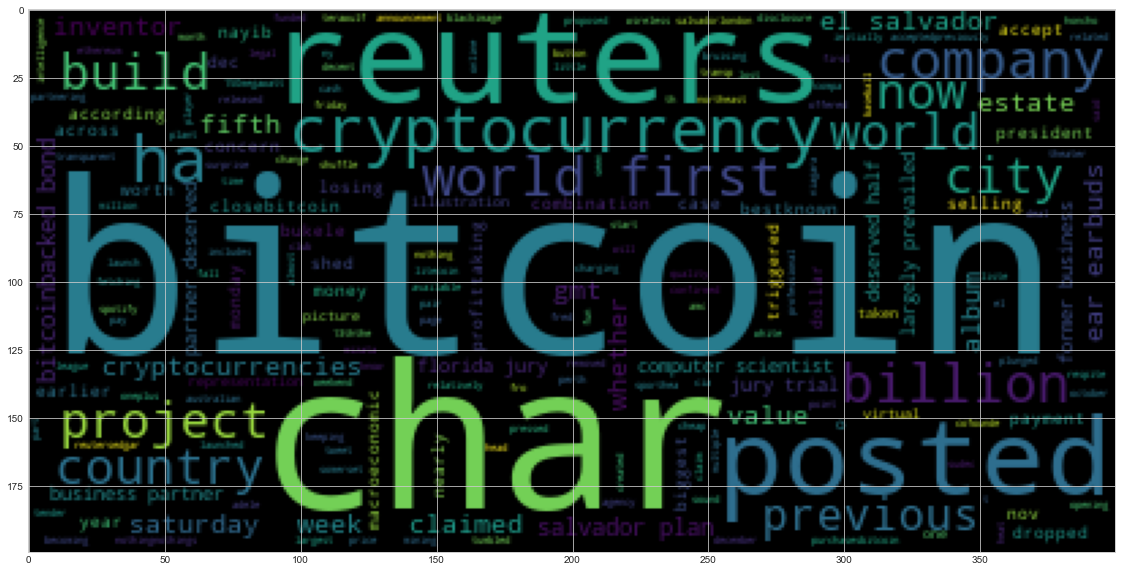

In [81]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(wc)

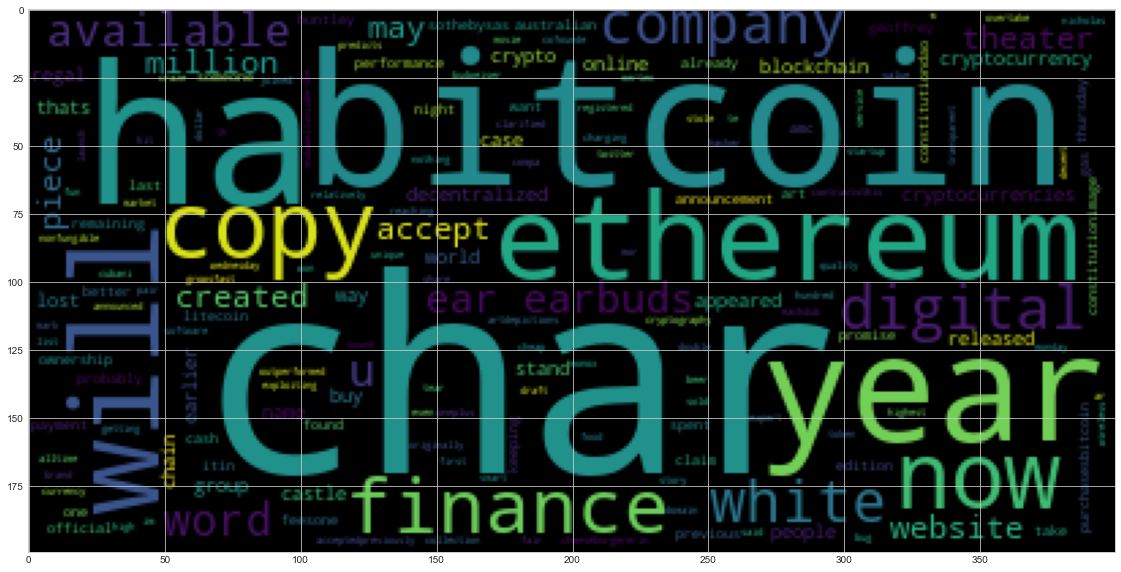

In [82]:
# Generate the Ethereum word cloud
wc2 = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [83]:
import spacy
from spacy import displacy

In [84]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 567 kB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [85]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [86]:
# Concatenate all of the Bitcoin text together
bitcoin_NER = btc_df["text"].str.cat()

In [87]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_NER)
doc.ents

# Add a title to the document
for ent in doc.ents:
    print(ent.text, ent.label_)

Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf DATE
150-megawatt QUANTITY
this year DATE
99 MONEY
OnePlus ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
AMC ORG
first ORDINAL
El Salvador GPE
Bitcoin City GPE
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
Monday DATE
Florida GPE
half CARDINAL
Adele PERSON
30 CARDINAL
+3186 ORG
4 CARDINAL
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 CARDINAL
Saturday DATE
4,514.87 MONEY
Bitcoin PERSON
28.7% PERCENT
Baseball League ORG
Perth Heat PERSON
first ORDINAL
Hea PERSON
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
3 CARDINAL
Reuters ORG
5.5% PERCENT
53,435.9 MONEY
22:04 CARDINAL
Friday DATE
3,112.06 MONEY
Bitcoin PERSON
22.6% PERCENT
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
9.29% PERCENT
48,752.15 M

In [88]:
# Render the visualization
displacy.render(doc, style='ent')

In [89]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Somerset', 'N.Y.', 'El Salvador/', 'El Salvador', 'Bitcoin City', 'El Salvador', 'Bitcoin City', 'Florida', 'El Salvador', 'Bitcoin City', 'Florida', 'Florida']


---

### Ethereum NER

In [92]:
# Concatenate all of the Ethereum text together
ethereum_NER = eth_df["text"].str.cat()

In [93]:
# Run the NER processor on all of the text
doc = nlp(ethereum_NER)
doc.ents

# Add a title to the document
for ent in doc.ents:
    print(ent.text, ent.label_)

this year DATE
Australian Geoffrey Huntley PERSON
chars]More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
AMC ORG
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
this year DATE
99 MONEY
OnePlus ORG
Merten PERSON
May 2018 DATE
Castle PRODUCT
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
Search GPE
2021 DATE
Squid Game ORG
year-long DATE
Xboxs ORG
Halo Infinite ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
less than two weeks DATE
DeFi GPE
Ethereum ORG
DeFi GPE
the British Institute of Verbatim Reporters ORG
Getty Images ORG
Ethereum ORG
US GPE
20 C

In [94]:
# Render the visualization
displacy.render(doc, style='ent')

In [95]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Sothebys', 'Search', 'DeFi', 'DeFi', 'US']


---